In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/user/Desktop/Machine Learning/Precios_de_medicamentos_de_patente_2005_2016.csv", encoding='latin1')

In [3]:
dataset.head()

,Empresa,Producto,Presentacion,Principio_activo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de16 mg.,Candesartan Cilexetilo,357.975,376.716667,389.575,410.325000,413.700000,434.4,457.9,457.9,480.8,NaN,NaN,NaN
1,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 16 mg.,Candesartan Cilexetilo,640.400,683.475000,706.800,744.475000,764.350000,803.9,828.0,828.0,869.4,NaN,NaN,NaN
2,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de 8 mg.,Candesartan Cilexetilo,269.500,270.850000,284.025,299.141667,309.850000,326.1,343.7,343.7,343.7,NaN,NaN,NaN
3,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 8 mg.,Candesartan Cilexetilo,476.675,497.425000,521.650,549.458333,579.391667,610.8,623.0,623.0,666.6,NaN,NaN,NaN
4,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS PLUS,Caja con 14 tabletas de16 mg./12.5 mg.,Candesartan Cilexetilo/Hidroclorotiazida,306.500,327.633333,343.575,361.900000,374.891667,394.6,415.9,415.9,436.7,NaN,NaN,NaN


In [4]:
# Ver las columnas principales (nombres de las columnas)
print(dataset.columns)

Index(['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')


In [5]:
columns_to_plot = ['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                   '2015', '2016']

In [6]:
# Crear una copia del dataset original
dataset_copy = dataset.copy()

In [7]:
# Reemplazar los valores faltantes (NaN) en las columnas numéricas con la media de cada columna
columns_years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

for column in columns_years:
    dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mean())

In [8]:
# Guardar el dataset modificado en un nuevo archivo CSV
dataset_copy.to_csv("C:/Users/user/Desktop/Machine Learning/Precios_de_medicamentos_de_patente_2005_2016_modificado-clustering.csv", index=False, encoding='latin1')

print("Archivo modificado y guardado exitosamente.")

Archivo modificado y guardado exitosamente.


In [9]:
dataset_copy.head()

,Empresa,Producto,Presentacion,Principio_activo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de16 mg.,Candesartan Cilexetilo,357.975,376.716667,389.575,410.325000,413.700000,434.4,457.9,457.9,480.8,12246.168738,15227.538058,16423.128679
1,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 16 mg.,Candesartan Cilexetilo,640.400,683.475000,706.800,744.475000,764.350000,803.9,828.0,828.0,869.4,12246.168738,15227.538058,16423.128679
2,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 14 tabletas de 8 mg.,Candesartan Cilexetilo,269.500,270.850000,284.025,299.141667,309.850000,326.1,343.7,343.7,343.7,12246.168738,15227.538058,16423.128679
3,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS,Caja con 28 tabletas de 8 mg.,Candesartan Cilexetilo,476.675,497.425000,521.650,549.458333,579.391667,610.8,623.0,623.0,666.6,12246.168738,15227.538058,16423.128679
4,"Abbott Laboratories de Mxico, S.A. de C.V.",BLOPRESS PLUS,Caja con 14 tabletas de16 mg./12.5 mg.,Candesartan Cilexetilo/Hidroclorotiazida,306.500,327.633333,343.575,361.900000,374.891667,394.6,415.9,415.9,436.7,12246.168738,15227.538058,16423.128679


In [10]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy.columns)

Index(['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')


In [11]:
columns_to_plot_copy = ['Empresa', 'Producto', 'Presentacion ', 'Principio_activo', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                   '2015', '2016']

In [12]:
# Crear una variable de clasificación basada en los precios del año 2016
dataset_copy['Precio_Alto_Bajo'] = np.where(dataset_copy['2016'] > dataset_copy['2016'].median(), 1, 0)  # 1 = Alto, 0 = Bajo

In [13]:
# Variables independientes (puedes seleccionar los años o características que quieras)
X = dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']] 

# Variable dependiente
y = dataset_copy['Precio_Alto_Bajo']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Crear el modelo de Support Vector Machine
svm_model = SVC()

In [15]:
# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVC()

In [16]:
# Hacer predicciones
y_pred_svm = svm_model.predict(X_test)

In [17]:
# Evaluar el rendimiento
print("Reporte de Clasificación para SVM:")
print(classification_report(y_test, y_pred_svm))
print("Exactitud del modelo SVM:", accuracy_score(y_test, y_pred_svm))

Reporte de Clasificación para SVM:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       195
           1       0.91      0.75      0.82        28

    accuracy                           0.96       223
   macro avg       0.94      0.87      0.90       223
weighted avg       0.96      0.96      0.96       223

Exactitud del modelo SVM: 0.9596412556053812


In [18]:
# Crear el modelo de K-Nearest Neighbors (k=5 por defecto)
knn_model = KNeighborsClassifier(n_neighbors=5)

In [19]:
# Entrenar el modelo
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Hacer predicciones
y_pred_knn = knn_model.predict(X_test)

In [21]:
# Evaluar el rendimiento
print("Reporte de Clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))
print("Exactitud del modelo KNN:", accuracy_score(y_test, y_pred_knn))

Reporte de Clasificación para KNN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       195
           1       0.91      0.75      0.82        28

    accuracy                           0.96       223
   macro avg       0.94      0.87      0.90       223
weighted avg       0.96      0.96      0.96       223

Exactitud del modelo KNN: 0.9596412556053812


In [22]:
# Seleccionar las columnas de años para el clustering
X_clustering = dataset_copy[['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]

In [23]:
# Crear el modelo K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

In [24]:
# Ajustar el modelo
kmeans.fit(X_clustering)

KMeans(n_clusters=3, random_state=42)

In [25]:
# Predecir los clusters
dataset_copy['Cluster_KMeans'] = kmeans.labels_

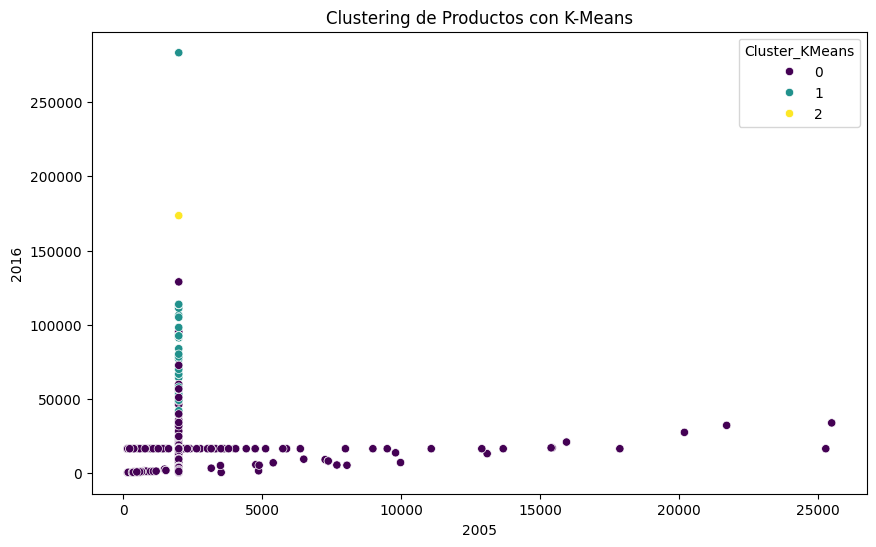

In [26]:
# Visualización del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2005', y='2016', hue='Cluster_KMeans', data=dataset_copy, palette='viridis')
plt.title('Clustering de Productos con K-Means')
plt.show()

In [27]:
# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [28]:
# Ajustar el modelo
dataset_copy['Cluster_DBSCAN'] = dbscan.fit_predict(X_clustering)

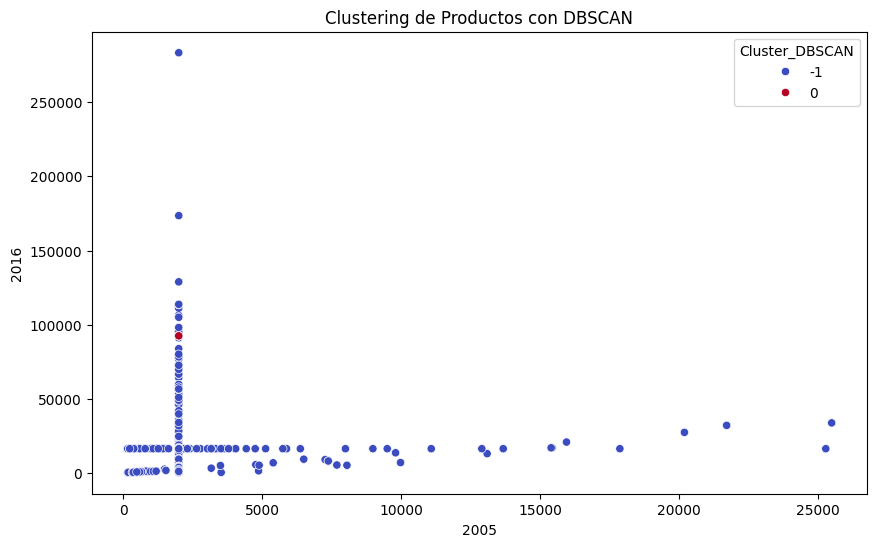

In [29]:
# Visualización del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2005', y='2016', hue='Cluster_DBSCAN', data=dataset_copy, palette='coolwarm')
plt.title('Clustering de Productos con DBSCAN')
plt.show()

In [30]:
# Escalar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [31]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [32]:
# Añadir las componentes principales al dataset
dataset_copy['PCA1'] = X_pca[:, 0]
dataset_copy['PCA2'] = X_pca[:, 1]

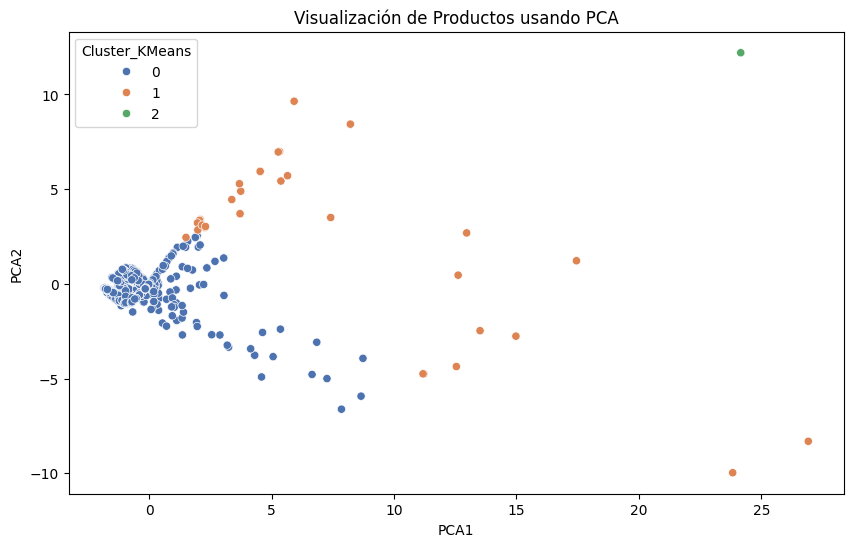

In [33]:
# Visualización de los resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=dataset_copy, palette='deep')
plt.title('Visualización de Productos usando PCA')
plt.show()

In [34]:
# Evaluar precisión del modelo de clasificación
print("Precisión de KNN:", accuracy_score(y_test, y_pred_knn))
print("Precisión de SVM:", accuracy_score(y_test, y_pred_svm))

# Si haces regresión en lugar de clasificación
# print("MSE:", mean_squared_error(y_true, y_pred))
# print("R2 Score:", r2_score(y_true, y_pred))

Precisión de KNN: 0.9596412556053812
Precisión de SVM: 0.9596412556053812
